## 라이브러리 임포트

In [2]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, make_blobs

## 스케일링
> 데이터가 가진 크기의 편차가 다르기 때문에 한 피처의 특징을 너무 많이 편경하거나 패턴을 찾아내는 데에 문제가 발생한다.    
따라서 데이터 스케일링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해줄 필요가 있다.

### 데이터 로드
- 파라미터
  - n_samples: 표본 데이터의 수
  - centers: 생성할 클러스터의 수 또는 중심
  - cluster_std: 클러스터의 표준 편차
- 리턴
  - X: (n_samples, n_features) 크기의 배열 독립 변수
  - y: (n_smaples) 크기의 배열 종속 변수



In [4]:
# 언더바 변수는 사용하지 않는 변수를 나타낸다. 5개의 클러스터를 생성한다.
X, _ = make_blobs(n_samples = 200, centers = 5, random_state = 4, cluster_std = 1.5)

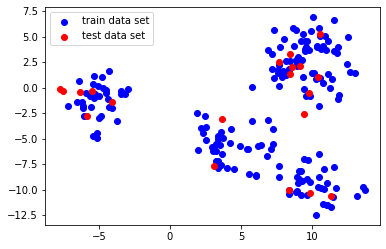

In [10]:
# 훈련 세트와 테스트 세트를 9대 1로  분리 
X_train, X_test = train_test_split(X, random_state=5, test_size=.1) 

plt.scatter(X_train[: ,0], X_train[: ,1], c='b', label='train data set')
plt.scatter(X_test[: ,0], X_test[: ,1], c='r', label='test data set')

plt.legend()
plt.show()

### PowerTransFormer
> 0 주변으로 데이터가 분포하게끔 스케일링    
> original보다 분포가 퍼지지만, 최대한 모양을 유지

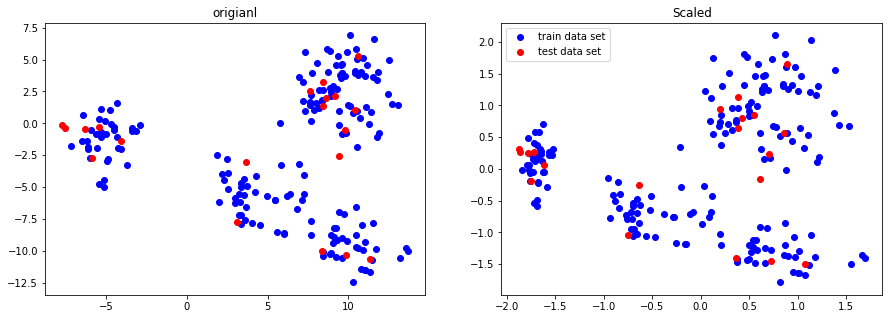

In [13]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

X_scaled = scaler.fit_transform(X_train)
# 해당 fit으로 test데이터도 transform 
X_test_scaled = scaler.transform(X_test)

fix, ax = plt.subplots(1, 2, figsize=[15,5])

# 첫번째 로우 & 왼쪽 - origianl data set 시각화 
ax[0].scatter(X_train[: , 0], X_train[:, 1], c='b', label='trian data set')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label='test data set')
ax[0].set_title('origianl')

# 첫번째 로우 & 오른쪽 - scaled data set 시각화 
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[: ,1], c='r', label= 'test data set')
ax[1].set_title('Scaled')

plt.legend()
plt.show()

### Quantile Transformer
> 1000개 분위를 n등분하여 0과 1사이에 데이터가 균일하게 분포하도록 스케일링    
> original의 모양을 보존하지 않는다.

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.
  warnings.warn(


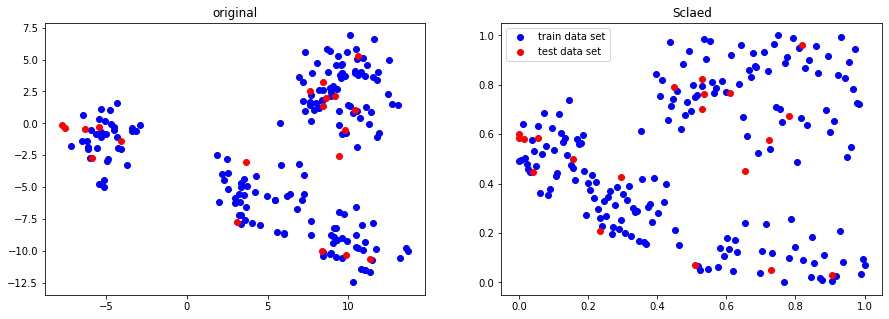

In [15]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2, figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0] .scatter(X_train[:, 0], X_train[:, 1], c='b', label = 'train data set')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label = 'test data set')
ax[0].set_title('original')

# 두번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', label = 'test data set')
ax[1].set_title('Sclaed')

plt.legend()
plt.show()

### Standard Scaler
> 표준 정규 분포이기 때문에, original 모양을 그대로 살리면서 scale만 조정    
> 가장 많이 사용하는 Sclaler

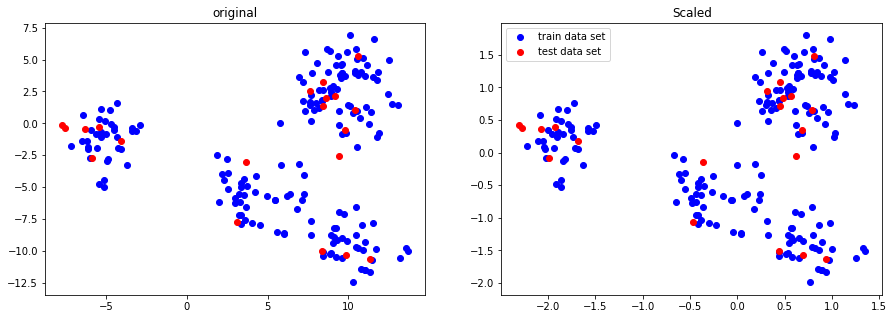

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2, figsize=[15,5])

ax[0].scatter(X_train[:, 0], X_train[: ,1], c='b', label='trian data set')
ax[0].scatter(X_test[: ,0], X_test[:, 1], c='r', label='test data set')
ax[0].set_title('original')

ax[1].scatter(X_scaled[: ,0], X_scaled[: ,1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[: ,0], X_test_scaled[:, 1], c='r', label= 'test data set')
ax[1].set_title('Scaled')

plt.legend()
plt.show()

### Robust Scaler
> standard scaler보다 범위가 좁다     
> 정규분포(평균, 분산)를 사용하지 않고 중간간값과 사분위수를 활용한다.     
> 이상치가 있는 데이터에 효과적이다 

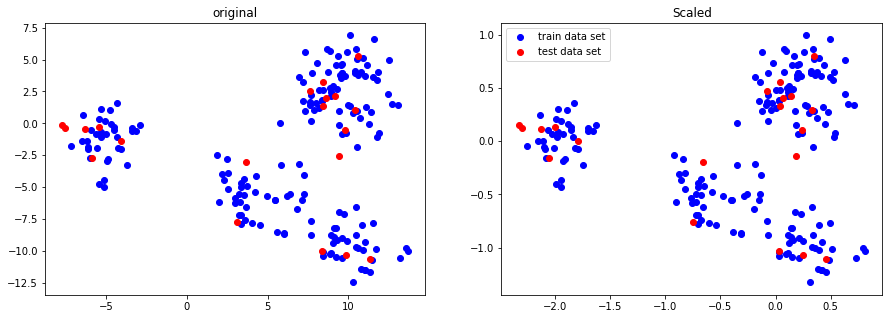

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label='train data set')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label='test data set')
ax[0].set_title('original')

ax[1].scatter(X_scaled[: ,0], X_scaled[: , 1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[: ,0], X_test_scaled[: ,1], c='r', label='test data set')
ax[1].set_title('Scaled')

plt.legend()
plt.show()

### MinMax Scaler
> 0과 1 사이로 scale을 down    
> original의 모양을 최대한 보존   
> 이상치에 예민

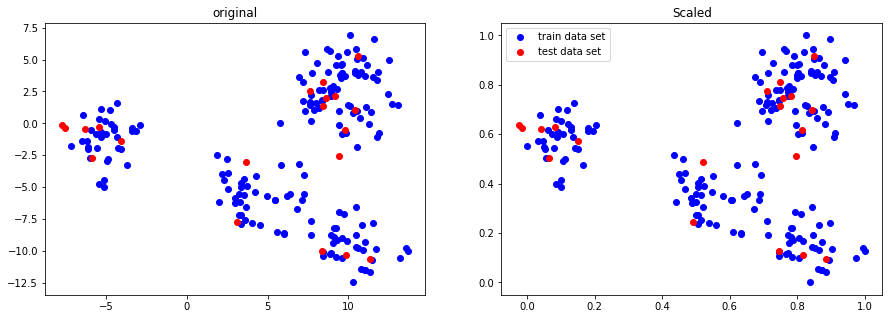

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2, figsize=[15,5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label='train data set')
ax[0].scatter(X_test[:, 0], X_test[:, 1] , c='r', label='test data set')
ax[0].set_title('original')

ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[:,0], X_test_scaled[:, 1], c='r', label='test data set')
ax[1].set_title('Scaled')

plt.legend()
plt.show()

### MaxAbs Scaler
> 형태가 망가지지 않는다.      
> 모든 피처들의 절대값이 0과 1 사이에 들어가도록 만든다.  따라서 절대값을 취하기 전의 값들은 -1과 1 사이에 분포한다.      
> MInMax보다는 값들 간의 격차를 유지하면서 간격을 좁힌다.    
> 이상치에 영향을 많이 받는다.   

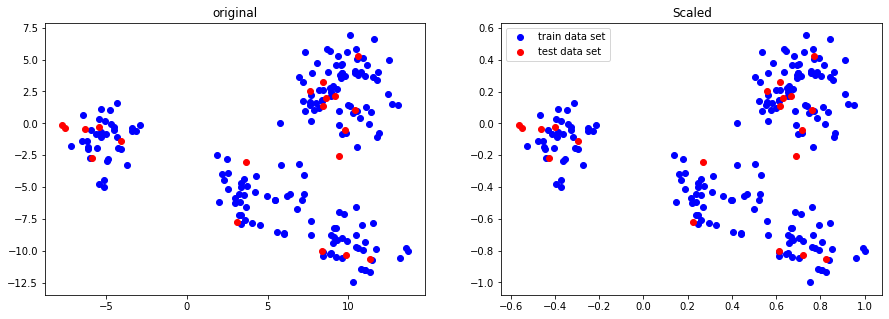

In [24]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15,5])

ax[0].scatter(X_train[:, 0], X_train[: ,1 ], c='b', label='train data set')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label='test data set')
ax[0].set_title('original')

ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label='train data set')
ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', label='test data set')
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## 예제

### 데이터 로드

In [26]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names )
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
# 기능 파악 
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## 모델 학습

### No Scaler

In [57]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
no_scaler_score = round(dtc.score(X_test, y_test), 4)
print('모델의 정확도 :', no_scaler_score)

모델의 정확도 : 0.886


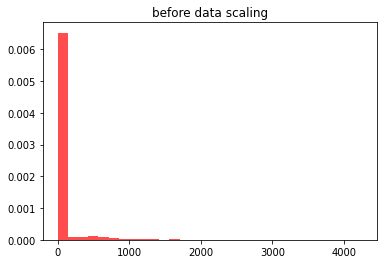

In [58]:
X_train_data = X_train.reshape(13650,1)

plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('before data scaling')
plt.show()

### PowerTransFormer()

In [59]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer()
ptf.fit(X_train)
X_train_scaled = ptf.transform(X_train)
X_test_scaled = ptf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'PowerTransformer 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

PowerTransformer 정확도: 0.9035 / No Scaler 정확도: 0.886


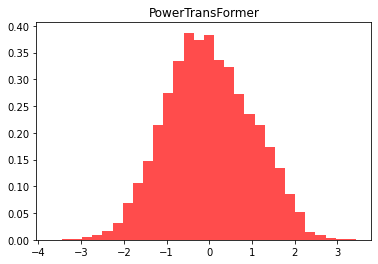

In [33]:
X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title('PowerTransFormer')
plt.show()

### QuantileTransFormer()
> 이상치에 예민하지 않다. 그러나 원 데이터가 많이 손상된다.    



In [60]:
from sklearn.preprocessing import QuantileTransformer

qtf = QuantileTransformer()
qtf.fit(X_train)
X_train_scaled = qtf.transform(X_train)
X_test_scaled = qtf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'QuantileTransformer 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

QuantileTransformer 정확도: 0.8947 / No Scaler 정확도: 0.886


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


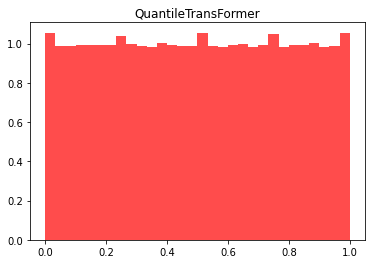

In [36]:
# 분포 내에서 데이터를 n등분 했다는 것을 알 수 있다. 

X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title('QuantileTransFormer')
plt.show()

In [40]:
# 정규분포로 표현할수도 있다. 

from sklearn.preprocessing import QuantileTransformer

qtf = QuantileTransformer(output_distribution='normal')
qtf.fit(X_train)
X_train_scaled = qtf.transform(X_train)
X_test_scaled = qtf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'QuantileTransFormer with normal 정확도 : {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도 : {no_scaler_score} ')

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


QuantileTransFormer with normal 정확도 : 0.8947 / No Scaler 정확도 : 0.9035 


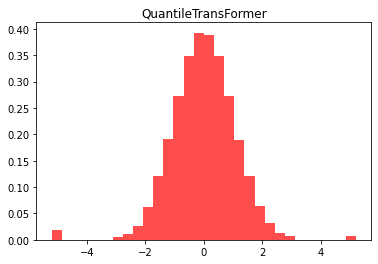

In [41]:
# 정규 분포의 형태로 그래프가 표현된다.

X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title('QuantileTransFormer')
plt.show()

### StandardScaler()
> 평균을 기준으로 하기 때문에 robust보다 이상치에 민감하다

In [43]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled= std.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'StandardScaler 정확도 : {round(dtc.score(X_test_scaled, y_test), 4)} / No Scalar 정확도 : {no_scaler_score}')

StandardScaler 정확도 : 0.886 / No Scalar 정확도 : 0.9035


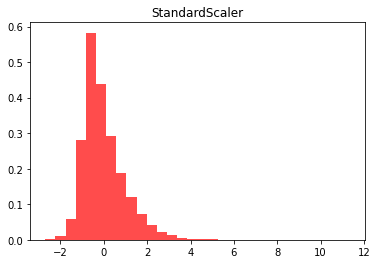

In [45]:
X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, alpha=0.7, color='red', density=True)
plt.title('StandardScaler')
plt.show()

### MinMaxScalar()

In [61]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'MinMaxScaler 정확도 : {round(dtc.score(X_test_scaled, y_test), 4)} / No Scalar 정확도 : {no_scaler_score}')

MinMaxScaler 정확도 : 0.9123 / No Scalar 정확도 : 0.886


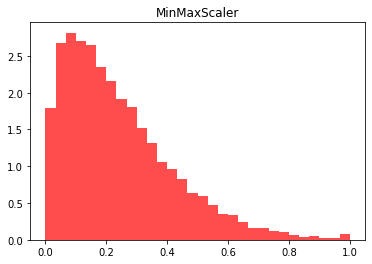

In [62]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('MinMaxScaler')
plt.show()

### RobustScalar()
> standard랑 비교했을 때, 꼬리가 있다는 공통점은 있으나 평균을 기준으로 하지 않는다는 차이가 있다.    
> 평균은 무조건 이상치에 영향을 받으나, 중간값은 영향을 덜 받으므로 이상치에 영향을 덜 받는다.     
> 원 데이터의 형태를 최대한 유지해준다. 

In [63]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f"RobustScaler 정확도 : {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도 : {no_scaler_score}")

RobustScaler 정확도 : 0.886 / No Scaler 정확도 : 0.886


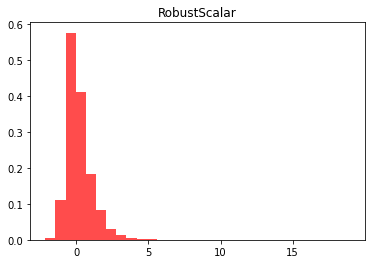

In [64]:
X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, alpha=0.7, color='red', density=True)
plt.title('RobustScalar')
plt.show()

### MaxAbsScaler()
> 이상치에 영향을 많이 받는다 .

In [65]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'MaxAbsScaler 정확도 : {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도 : {no_scaler_score}')

MaxAbsScaler 정확도 : 0.8772 / No Scaler 정확도 : 0.886


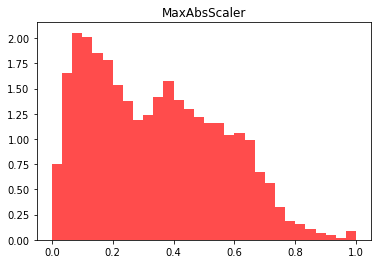

In [68]:
X_train_scaled_ss = X_train_scaled.reshape(13650, 1)

plt.hist(X_train_scaled_ss, bins=30, color='red', density=True, alpha=0.7)
plt.title('MaxAbsScaler')
plt.show()